<div style="padding: 0.5em; background-color: #1876d1; color: #fff;">

### **[Part 4] Computational Drug Discovery - Regression Models with Random Forest**

</div>
In **Part 4**, we will be building a regression model using the random forest algorithm.

Note :
* Target enzyme: Aromatase responsible for breast cancer
* Objective: find compound that inhibit Aromatase function

---
<b># Bioinformatics Project </b>

<div style="padding: 0.5em; background-color: #eeeeee; color: #000;">
    <b>NOTE</b>: In part 2 we build Lipinski descriptor and in the previous one (part3) we have prepare PaDEL or PubChem descriptor and the question is what is the difference between two. 
    <ul>
        <li>
            Firsly the Lipinski with 5 criteria give us a global or simple properrty of the the compounds saying that compound that match the 5 criteria could be a good oral drug (Lipinski describe the size of the molecule(MW), the solubility of the molecule, the Number of hydrogen bond donor and acceptor)
        </li>
        <li>
            whereas PubChem give local feature of the molecule where each of them are describe by unique building block
        </li>
    </ul>
</div>

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
df = pd.read_csv('data/06-bioactivity_data_3classpubchem_fp.csv')

## **3. Input features**
The ***Aromatase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2593,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2594,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2595,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [4]:
Y = df.pIC50
Y

0       5.148736
1       4.301029
2       6.623241
3       7.243364
4       7.266803
          ...   
2592    7.882729
2593    7.882729
2594    6.623606
2595    5.958568
2596    5.596691
Name: pIC50, Length: 2597, dtype: float64

### **3.3. Let's examine the data dimension**

In [5]:
X.shape

(2597, 881)

In [6]:
Y.shape

(2597,)

### **3.4. Remove low variance features**

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [8]:
X.shape

(2597, 174)

## **4. Data split (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((2077, 174), (2077,))

In [11]:
X_test.shape, Y_test.shape

((520, 174), (520,))

## **5. Building a Regression Model using Random Forest**

In [14]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5229340596503105

In [15]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

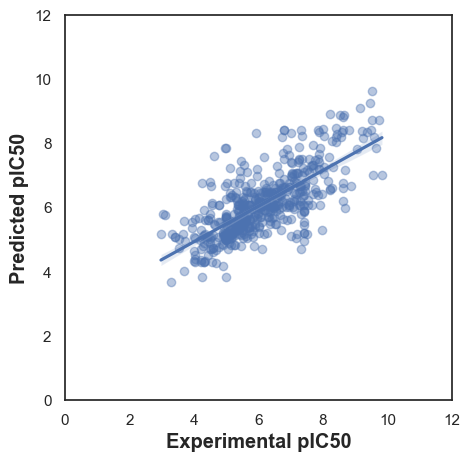

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

---